# Homework 2: PLA and Pocket algorithm
In this homework, you will run your own Perceptron Learnign Algorithm and Pocket algorithm step by step. Plese fill the blanks (## your code goes here##)

# Data description
Two csv files are attached for this homework. The first column in DigitsTraining and DigitsTesting corresponds to the digit number, following columns correspond to 256 pixels of the 16x16 pixel image of the digit. Thus, we have 7291 inputs in DigitsTraining and 2007 inputs in DigitsTesting. From these datasets, work only with those  inputs that correspond to the digits you chose. Remember, one of the digits corresponds to the final number in your driver license. Your task is filling the blanks #your code goes here#

# Perceptron Learning Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Load training data and testing data
train = np.genfromtxt('DigitsTraining.csv', delimiter=',')
test = np.genfromtxt('DigitsTesting.csv', delimiter=',')


#Pre-processing data into data labels and data
X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]


#To plot line y = ax + b
def line(w, data=None):
    a = - w[1] / w[2]
    b = - w[0] / w[2]
    x_line = np.linspace(0.4, 1, 100)
    if data is not None:
        return a*data + b
    else:
        return a*x_line + b

def symmetry(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
   
   # np.flipud and np.fliplr functions are used to flip the 16:16 matrix upside-down and Left-right respectively
    
    X_ud = np.flipud(X)
    X_lr = np.fliplr(X)
    
    S_h = np.mean(abs(X - np.flipud(X)))
    S_v = np.mean(abs(X - np.fliplr(X)))
    
    # print(X_up)
    
    symm = (S_h + S_v) / 2
    

    return symm



In [2]:
# Prepare Training Data for 8's and 1's. Please changed for the two digits you chose (one of them is the last digit of the driver license) 
#Extract the Digit1 and Digit2 from the data
Digit1 = X_train[y_train == 8]
y_train_Digit1 = np.ones(len(Digit1))
Digit2 = X_train[y_train == 1]
y_train_Digit2 = -np.ones(len(Digit2))

#Calculate averages and symmetries of the digits in training data

symm_Digit2 = [symmetry(im) for im in Digit2]
symm_Digit1 = [symmetry(im) for im in Digit1]

#print(symm_Digit2)
#print(symm_Digit1)
#print(y_train_Digit2)
# def intensity(X):
#     X_shapes = (16, 16)
#     X = X.reshape(X_shapes)
#     return np.mean(X)

# Intensity is the how much grey scale is being used in the black and white image. So, I used the np.mean of the pixels grayscale values to calculate the intensity.

avg_intensity_Digit1 = [np.mean(im) for im in Digit1]
avg_intensity_Digit2 = [np.mean(im) for im in Digit2]


#Concatenate the intensities and symmetry
new_Digit1 = np.c_[avg_intensity_Digit1, symm_Digit1]
new_Digit2 = np.c_[avg_intensity_Digit2, symm_Digit2]

#print(new_Digit1)

#Stack all the data together and randomize their locations.
X_new = np.r_[new_Digit1, new_Digit2]
y_new = np.r_[y_train_Digit1, y_train_Digit2]
R_num = np.random.randint(X_new.shape[0], size = (X_new.shape[0],))
X_new = X_new[R_num]
y_new = y_new[R_num]

# print(X_new)
# print(y_new)


In [3]:
#Prepare the test data for 8's and 1's. Please adjust for your two numbers, where one of them is the last digit of your driver license
X_test_Digit1 = X_test[y_test == 8]
y_test_Digit1 = np.ones(len(X_test_Digit1))
X_test_Digit2 = X_test[y_test == 1]
y_test_Digit2 = -np.ones(len(X_test_Digit2))

X_test_new = np.r_[X_test_Digit1, X_test_Digit2]
y_test_new = np.r_[y_test_Digit1, y_test_Digit2]

R = np.random.randint(X_test_new.shape[0], size = (X_test_new.shape[0],))

X_test_new = X_test_new[R]
y_test_new = y_test_new[R]

#Calculate averages and symmetries of the digits in testing data
test_symm = [symmetry(im) for im in X_test_new]

#Calculate intensity of the digits images in testing data
avg_int_test = [np.mean(im) for im in X_test_new]

X_test_final = np.c_[avg_int_test, test_symm]

#print(X_test_final)



In [17]:
#Perceptron function for n iterations

 #For this function
    #data is the data to train the PLA.. np_c concatenates a column of ones to the data
    #data_test is the data to test the PLA.. np_c concatenates a column of ones to the data_test
    #w starts at a random value (np.random.random)
    #difference contains all the missclassified points
    
    #please implement the logic of the PLA that can be found in the slides. Remember that the algorithm stops if it reaches the maximum number
    #of iterations or if all the points in the training set are correctly classified. The error can be defined as the number of missclassied points divided by the total number of points 
    
def perceptron(input_data,y,input_data_test,y_test,max_iter):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    w = np.random.random(data.shape[1]).reshape(-1,1)
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    difference = (f != current)
    
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    y_test =y_test.reshape(-1,1)
    current_test = np.sign(data_test @ w)
    difference_test = (y_test != current_test)
    
    t = 0
    Ein = [difference.sum()/len(difference)]
    Eout = [difference_test.sum()/len(difference_test)]
    
    #print(difference.sum(), len(difference))
    for i in range(max_iter):
        if(difference.sum() != 0):
            rand = np.random.choice(np.where(difference)[0], 1)
            w += (f[rand] * data[rand]).reshape(-1, 1)
            
            current = np.sign(data @ w)
            difference = (f != current)
            Ein.append(difference.sum()/len(difference))
            
            current_test = np.sign(data_test @ w)
            difference_test = (y_test != current_test)
            Eout.append(difference_test.sum()/len(difference_test))
            
        else:
            break
            
    return Ein,Eout,w


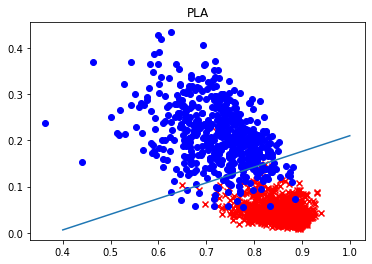

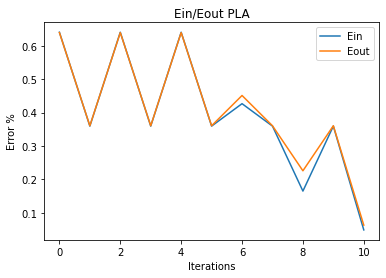

In [58]:
Ein,Eout, weight = perceptron(X_new, y_new,X_test_final,y_test_new, 10)
#Plot the graph
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.show()



#Plot Ein and Eout 
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

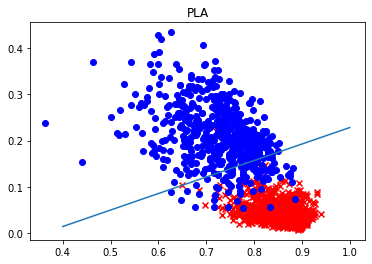

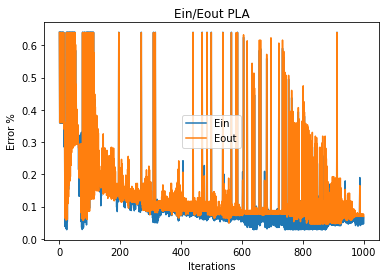

In [6]:
Ein,Eout, weight = perceptron(X_new, y_new,X_test_final,y_test_new, 1000)
#Plot the graph
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.show()



#Plot Ein and Eout 
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

In [7]:
# The below function will calculate the weights based on all the data points.

def perceptron_2(input_data,y,input_data_test,y_test,max_iter):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    w = np.random.random(data.shape[1]).reshape(-1,1)
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    difference = (f != current)
    
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    y_test =y_test.reshape(-1,1)
    current_test = np.sign(data_test @ w)
    difference_test = (y_test != current_test)
    
    t = 0
    Ein = [difference.sum()/len(difference)]
    Eout = [difference_test.sum()/len(difference_test)]
    
    #print(difference.sum(), len(difference))
    for i in range(max_iter):
        if(difference.sum() != 0):
            for x,val in enumerate(data):
                current[x] = np.sign(val @ w)
                if current[x] != f[x]:
                    w += (f[x] * val).reshape(-1, 1)
                    

            difference = (f != current)              
            Ein.append(difference.sum()/len(difference))

            current_test = np.sign(data_test @ w)
            difference_test = (y_test != current_test)
            Eout.append(difference_test.sum()/len(difference_test))

        else:
            break
            
    return Ein,Eout,w

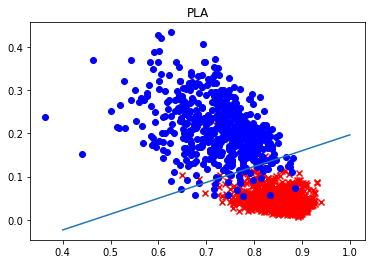

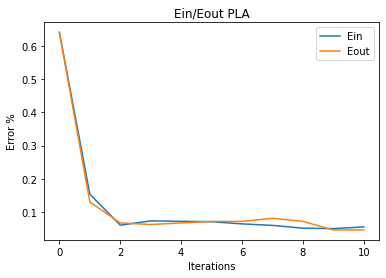

In [62]:
Ein,Eout, weight = perceptron_2(X_new, y_new,X_test_final,y_test_new, 10)
#Plot the graph
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.show()



#Plot Ein and Eout 
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

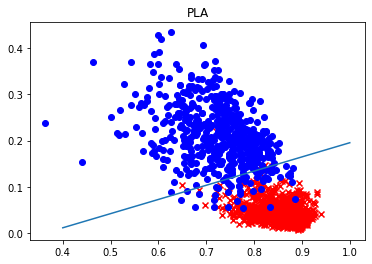

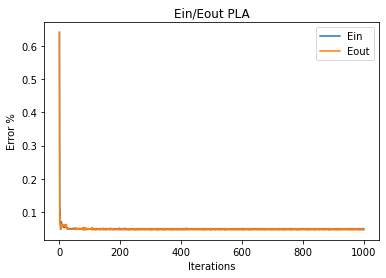

In [67]:
Ein,Eout, weight = perceptron_2(X_new, y_new,X_test_final,y_test_new, 1000)
#Plot the graph
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.show()



#Plot Ein and Eout 
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

In [10]:
def pocket(input_data,y,input_data_test,y_test,max_iter,w=None):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    if w is None:
        w = np.random.random(data.shape[1]).reshape(-1,1)
    else:
        w   = w.reshape(-1,1) 
    
    wf=w   
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    
    Ein=[]
    Eout=[]
    error=difference.sum()
    Ein.append(error * (1/len(difference)))
    current_test=  np.sign(data_test @ wf)
    difference_test= (y_test != current_test)
    error_test=difference_test.sum()
    Eout.append(error_test * (1/len(difference_test)))

    t = 0
     
    #logic of the pocket algorithm. w will be updated according to the evolution of the error based on the random data point selection
    
    for i in range(max_iter):
        if(difference.sum() != 0):
            rand = np.random.choice(np.where(difference)[0], 1)
            w += (f[rand] * data[rand]).reshape(-1, 1)
            
            current = np.sign(data @ w)
            difference = (f != current)
            err_ratio = difference.sum()/len(difference)
            
            
            current_test = np.sign(data_test @ w)
            difference_test = (y_test != current_test)
            err_ratio_test = difference_test.sum()/len(difference_test)
            
            if err_ratio < Ein[-1] :
                Ein.append(err_ratio)
                wf = w
            else :
                Ein.append(Ein[-1])
                
            if err_ratio_test < Eout[-1] :
                Eout.append(err_ratio)
            else :
                Eout.append(Eout[-1])
            
        else:
            break
    
    return Ein,Eout,wf


Min Ein Pocket= 0.34195216548157725
Min Eout Pocket= 0.34195216548157725


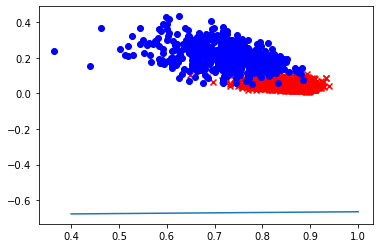

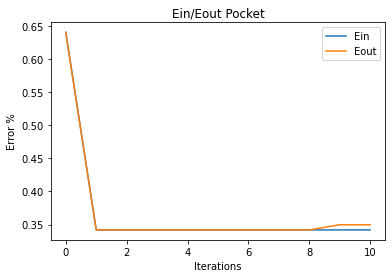

In [33]:
#Using pocket algorithm
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 10)

print('Min Ein Pocket=',min(Ein))
print('Min Eout Pocket=',min(Eout))


#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

Min Ein Pocket= 0.027149321266968326
Min Eout Pocket= 0.031027795733678087


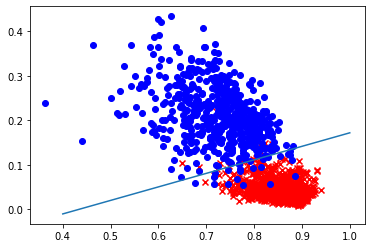

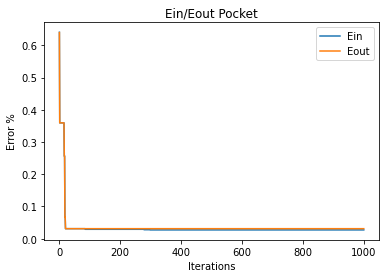

In [40]:
#Using pocket algorithm
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 1000)

print('Min Ein Pocket=',min(Ein))
print('Min Eout Pocket=',min(Eout))


#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()



In [13]:
def pocket_2(input_data,y,input_data_test,y_test,max_iter,w=None):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    if w is None:
        w = np.random.random(data.shape[1]).reshape(-1,1)
    else:
        w   = w.reshape(-1,1) 
    
    wf=w   
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    
    Ein=[]
    Eout=[]
    error=difference.sum()
    Ein.append(error * (1/len(difference)))
    current_test=  np.sign(data_test @ wf)
    difference_test= (y_test != current_test)
    error_test=difference_test.sum()
    Eout.append(error_test * (1/len(difference_test)))

    t = 0
     
    #logic of the pocket algorithm. w will be updated according to the evolution of the error based on the all the data point
    
    for i in range(max_iter):
        if(difference.sum() != 0):
            for x,val in enumerate(data):
                current[x] = np.sign(val @ w)
                if current[x] != f[x]:
                    w += (f[x] * val).reshape(-1, 1)
            
            difference = (f != current)
            err_ratio = difference.sum()/len(difference)
            
            
            current_test = np.sign(data_test @ w)
            difference_test = (y_test != current_test)
            err_ratio_test = difference_test.sum()/len(difference_test)
            
            if err_ratio < Ein[-1] :
                Ein.append(err_ratio)
                wf = w
            else :
                Ein.append(Ein[-1])
                
            if err_ratio_test < Eout[-1] :
                Eout.append(err_ratio)
            else :
                Eout.append(Eout[-1])
            
        else:
            break
    
    return Ein,Eout,wf

Min Ein Pocket= 0.03878474466709761
Min Eout Pocket= 0.0491273432449903


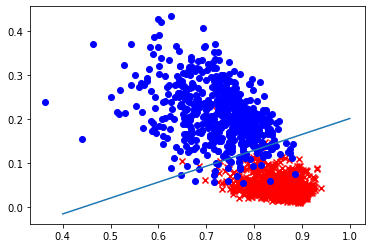

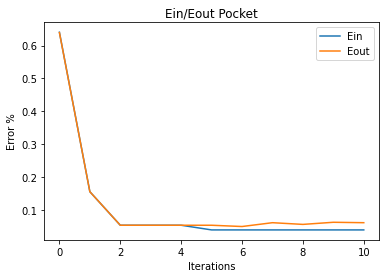

In [36]:
#Using pocket algorithm with w calculated for all data points in every iteration
Ein, Eout,w = pocket_2(X_new, y_new,X_test_final,y_test_new, 10)

print('Min Ein Pocket=',min(Ein))
print('Min Eout Pocket=',min(Eout))


#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

Min Ein Pocket= 0.04654169360051713
Min Eout Pocket= 0.04654169360051713


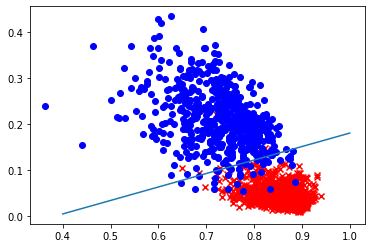

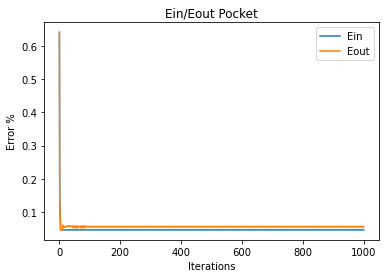

In [15]:
#Using pocket algorithm with w calculated for all data points in every iteration
Ein, Eout,w = pocket_2(X_new, y_new,X_test_final,y_test_new, 1000)

print('Min Ein Pocket=',min(Ein))
print('Min Eout Pocket=',min(Eout))


#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()


## Conclusion :
We have used the Perceptron and Pocket algorithms with weight calculation for rmdonly selected data point and for all the data points with 10 and 1000 iterations.
1. Pocket algorithm is better as the error doesn't fluctuate as it will keep the minimum error and will only change once it will get a lower error than previous low value.
2. The above execution shows that none of the algorithm was able to properly clasify the data points in 10 iterations. 1000 iterations returned better results.
3. It matter a lot in PLA if we are randomly choosing the data point to calculate the weights or we are calculating it based on all incorrectly classified data points. PLA works better with calculating weights the weight based on all incorrectly classified data points. It was able to classify th data points properly with just 10 iterations if the weight is calculated for all incorrectly classified data points.
4. It doesn't matter how you calculate the weight in Pocket algorithm with 1000 iterations.
5. But the best algorithm with minimal computation is Pocket with weights calculated based on all incorrectly classified data points. It was able to classify the data points properly with even 10 iterations.